___
# MINIPROJETO 1

## <font color='red'>Gabriel Vilaça</font>
___

## <font color='blue'>Horário do Crime em LA</font>

___
### Itens 1 a 3 - Resolução:

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel\Documents


In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel\Documents


In [4]:
dados = pd.read_csv('Crimes_2012-2015.csv')

Dataframe com os boletins de ocorrência da polícia de Los Angeles nos EUA no período de 2012-2015.

In [5]:
tamanho = dados.shape[0]
data = pd.DataFrame()

In [6]:
dados

,.,DR.NO,DATE_OCC,TIME_OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,3/20/2013,132007717,3/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,3/10/2013,130608787,3/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,5/26/2013,130510483,5/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"
5,5/24/2013,131213618,5/22/2013,1145,12,77th Street,1211,997,TRAFFIC DR #,UNK,Unknown,54TH,CRENSHAW,"(33.9931, -118.3308)"
6,8/23/2014,140119745,8/23/2014,2240,1,Central,111,310,BURGLARY,IC,Invest Cont,500 N FIGUEROA ST,NaN,"(34.0617, -118.2469)"
7,8/23/2014,142015263,8/23/2014,1337,20,Olympic,2023,901,VIOLATION OF RESTRAINING ORDER,IC,Invest Cont,300 S SERRANO AV,NaN,"(34.069, -118.3066)"
8,8/22/2014,140119671,8/23/2014,1945,1,Central,111,210,ROBBERY,IC,Invest Cont,900 N HILL ST,NaN,"(34.0644, -118.2387)"
9,8/22/2014,140915108,8/22/2014,825,9,Van Nuys,933,901,VIOLATION OF RESTRAINING ORDER,IC,Invest Cont,14600 CALVERT ST,NaN,"(34.1817, -118.4509)"


Correção dos horários da tabela para horas, em frações de horas.
Ex: 2015 == 20:15; que se transforma em 20.25 horas (os minutos em frações de horas)

In [62]:
data["Horarios"] = dados.TIME_OCC
data.Horarios[dados.TIME_OCC < 500] = data.Horarios + 2400 
data.Horarios = (data.Horarios/100).round(decimals=0) + ((((data.Horarios % 100)/100)*5)/3).round(decimals=2)
mu = data.Horarios.mean()

Correção dos valores para melhor visualização do fenômeno. Aqui, o dia será analisado das 05:00 até as 29:00
(05:00 do dia seguinte, ou seja, 24 horas depois)


### Itens 4 a 6 - Resolução:

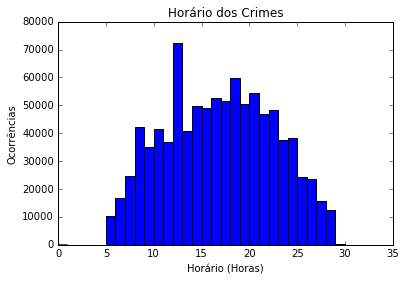

In [63]:
data.Horarios.describe()
faixatempo = np.arange(0,35,1)
tempo = pd.cut(data.Horarios, faixatempo)
tempo.value_counts()
plot = data.Horarios.plot.hist(bins = faixatempo)
plt.title("Horário dos Crimes")
plt.xlabel("Horário (Horas)")
plt.ylabel("Ocorrências")

Para analisar o histograma, vamos utilizar as distribuições Normal e de Weibull.

___
### Itens 7 a 9 - Resolução:

ValueError: x and y must have same first dimension

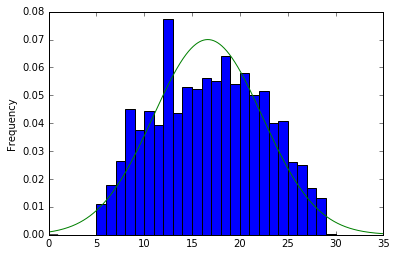

In [94]:
# Para a função Normal

mu_normal = data.Horarios.mean()
sigma_normal = data.Horarios.std()

# Para a função Weibull  
#alfa = 2
#beta = 3
#x = np.arange(1,100.)/50.

times = np.linspace(0,35,1000)

# histograma e densidade teórica
data.Horarios.plot.hist(bins=range(0, 35), normed=True, label="Histograma dos horários")
normal = stats.norm.pdf(times, loc=mu_normal, scale=sigma_normal)
Wweibull =  stats.weibull_min.pdf(x, alfa, beta)

plt.plot(times, normal, '-', color='green', label="Normal") # Plota a Normal teórica
#plt.plot(times, weibull, '-', color='red', label="Weibull") # Plota a Weibull teórica

plt.legend()

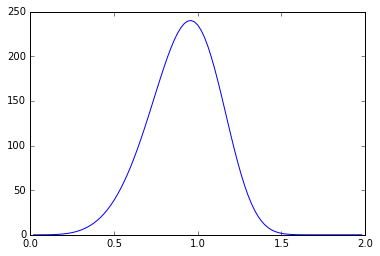

In [92]:
x = np.linspace(0,35,1000)
def weib(x,n,a):
     return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 2., 3.).max()
plt.plot(x, weib(x, 1., 5.)*scale)
plt.show()

___
### Itens 10 e 11 - Resolução: